<a href="https://colab.research.google.com/github/AshwinUnnikrishnan/AI-for-Human-Computer-Interaction/blob/main/Assignment3/Assignment_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

In [88]:
df = pd.read_csv('data.csv')


In [4]:
df.keys()

Index(['AnalysisDate', 'Date Of Death Year', 'Date Of Death Month',
       'Start Date', 'End Date', 'Jurisdiction of Occurrence', 'Sex',
       'Race/Ethnicity', 'AgeGroup', 'AllCause', 'NaturalCause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)'],
      dtype='object')

In [7]:
df['Sex'].unique()

array(['F', 'M', 'Female', 'Male'], dtype=object)

In [8]:
df['Sex'] = df['Sex'].replace({'F': 'Female', 'M': 'Male'})

In [9]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
race_list = df['Race/Ethnicity'].unique().tolist()
sex_list = df['Sex'].unique().tolist()
age_list = df['AgeGroup'].unique().tolist()

In [28]:
race_list

['Hispanic',
 'Non-Hispanic American Indian or Alaska Native',
 'Non-Hispanic Asian',
 'Non-Hispanic Black',
 'Non-Hispanic White',
 'Other']

In [30]:
entries = []

In [21]:
def submit_info(sender):
    name = name_widget.value
    age = age_widget.value
    sex = sex_widget.value
    race = race_widget.value
    # Print the information to the console
    print(f"Name: {name}\nAge: {age}\nSex: {sex}\nRace: {race}")
    # Append the information to the list of entries
    entries.append({'Name': name, 'Race': race, 'Age': age, 'Sex': sex})

    # Clear the input widgets
    name_widget.value = ''
    race_widget.value = None
    age_widget.value = None
    sex_widget.value = None

In [24]:

# Create text input widgets for name, age, and sex
name_widget = widgets.Text(description="Name:")
race_widget = widgets.RadioButtons(
    options=race_list,
    description="Race:"
)
age_widget = widgets.RadioButtons(
    options=age_list,
    description="Age:"
)
sex_widget = widgets.RadioButtons(
    options=sex_list,
    description="Sex:"
)

# Create a button to submit the information
submit_button = widgets.Button(description="Submit")

# Create a function to handle the button click

# Attach the function to the button's click event
submit_button.on_click(submit_info)

### Design for personas. For each of the fictional users given, create a single visualization that
shows the most likely cause of death for that user. To experiment with design choices,
make each user/visualization pair a different visualization that represents different design
choices (e.g. you could try a different plot type for some users). [20 points]
- Jenny is a young black female college student. She is 20 and lives a healthy
lifestyle. He doesn’t smoke or use drugs, but does drink alcohol in social settings.
- Marco is a 72 year old man, immigrated from Korea to the United States in his
thirties. His wife passed away from cancer last year.
- Eva is a 36 year old woman with two kids. She is half Cuban and co-parents her
kids with a long term romantic partner but does not believe in marriage. She has a
strong family history of diabetes.
- Elmer is a 40 year old Boston native, whose family is from Ireland. He was
diagnosed with a chronic respiratory disease and has felt depression.
What visualization techniques did you use? [3 points]

In [25]:
# Display the widgets
display(name_widget, age_widget, sex_widget, race_widget, submit_button)

Text(value='', description='Name:')

RadioButtons(description='Age:', options=('0-4 years', '5-14 years', '15-24 years', '25-34 years', '35-44 year…

RadioButtons(description='Sex:', options=('Female', 'Male'), value='Female')

RadioButtons(description='Race:', options=('Hispanic', 'Non-Hispanic American Indian or Alaska Native', 'Non-H…

Button(description='Submit', style=ButtonStyle())

Name: 
Age: 15-24 years
Sex: Female
Race: Non-Hispanic Black
Name: 
Age: 65-74 years
Sex: Male
Race: Non-Hispanic Asian
Name: 
Age: 35-44 years
Sex: Female
Race: Hispanic
Name: 
Age: 35-44 years
Sex: Male
Race: Non-Hispanic White
Name: Jenny
Age: 15-24 years
Sex: Female
Race: Non-Hispanic Black
Name: Marco
Age: 65-74 years
Sex: Male
Race: Non-Hispanic Asian
Name: Eva
Age: 35-44 years
Sex: Female
Race: Hispanic
Name: Elmer
Age: 35-44 years
Sex: Male
Race: Non-Hispanic White


In [32]:
entries

[{'Name': 'Jenny',
  'Race': 'Non-Hispanic Black',
  'Age': '15-24 years',
  'Sex': 'Female'},
 {'Name': 'Marco',
  'Race': 'Non-Hispanic Asian',
  'Age': '65-74 years',
  'Sex': 'Male'},
 {'Name': 'Eva', 'Race': 'Hispanic', 'Age': '35-44 years', 'Sex': 'Female'},
 {'Name': 'Elmer',
  'Race': 'Non-Hispanic White',
  'Age': '35-44 years',
  'Sex': 'Male'}]

In [ ]:
entries = [{'Name': 'Jenny',
  'Race': 'Non-Hispanic Black',
  'Age': '15-24 years',
  'Sex': 'Female'},
 {'Name': 'Marco',
  'Race': 'Non-Hispanic Asian',
  'Age': '65-74 years',
  'Sex': 'Male'},
 {'Name': 'Eva', 'Race': 'Hispanic', 'Age': '35-44 years', 'Sex': 'Female'},
 {'Name': 'Elmer',
  'Race': 'Non-Hispanic White',
  'Age': '35-44 years',
  'Sex': 'Male'}]

In [87]:
def get_row(df, age, sex, race):
  return df[(df['AgeGroup'] == age) & (df['Sex'] == sex) & (df['Race/Ethnicity'] == race)].reset_index(drop=True)

In [89]:
res_J = get_row(df, entries[0]['Age'] , entries[0]['Sex'], entries[0]['Race'])
res_M = get_row(df, entries[1]['Age'] , entries[1]['Sex'], entries[1]['Race'])
res_E = get_row(df, entries[2]['Age'] , entries[2]['Sex'], entries[2]['Race'])
res_El = get_row(df, entries[3]['Age'] , entries[3]['Sex'], entries[3]['Race'])

In [91]:
disease_cols = ['AllCause', 'NaturalCause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)']

In [94]:
def create_histogram_age_group(df, columns_to_sum):
    # Group by 'AgeGroup' and calculate the sum for the specified columns
    result = df.groupby('AgeGroup')[columns_to_sum].sum().reset_index()

    # Add a sorting column for custom sorting
    result['SortingColumn'] = result['AgeGroup'].apply(lambda x: int(x[:2]) if x[:2].isdigit() else int(x[0]))
    # Sort the DataFrame based on the "SortingColumn"
    result = result.sort_values(by='SortingColumn', ascending=True)

    # Remove the temporary column
    result = result.drop(columns=['SortingColumn'])

    return result

In [95]:
result_M = create_histogram_age_group(res_M, disease_cols)
result_E = create_histogram_age_group(res_E, disease_cols)
result_El = create_histogram_age_group(res_El, disease_cols)
result_J = create_histogram_age_group(res_J, disease_cols)

In [96]:
result_M.shape

(1, 16)

In [125]:
def plot_histogram(res, columns_to_sum, sort_v):
    # Calculate the sum for the specified columns
    res = res.drop(columns=['AgeGroup'])

    summed_values = res[columns_to_sum].sum()

    # Sort the columns based on the summed values in descending order
    if sort_v:
      summed_values = summed_values.sort_values(ascending=False)

    # Reorder the DataFrame columns based on the sorting
    res = res[summed_values.index]

    # Create a histogram
    plt.figure(figsize=(12, 6))
    plt.bar(res.columns, res.iloc[0].values, color='blue')

    # Customize the plot
    plt.xlabel('Disease')
    plt.ylabel('Count')
    plt.title('Histogram of Disease Counts')
    plt.xticks(rotation=90)

    # Show the plot
    plt.tight_layout()
    plt.show()



<ipython-input-125-2dd7c9393b19>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


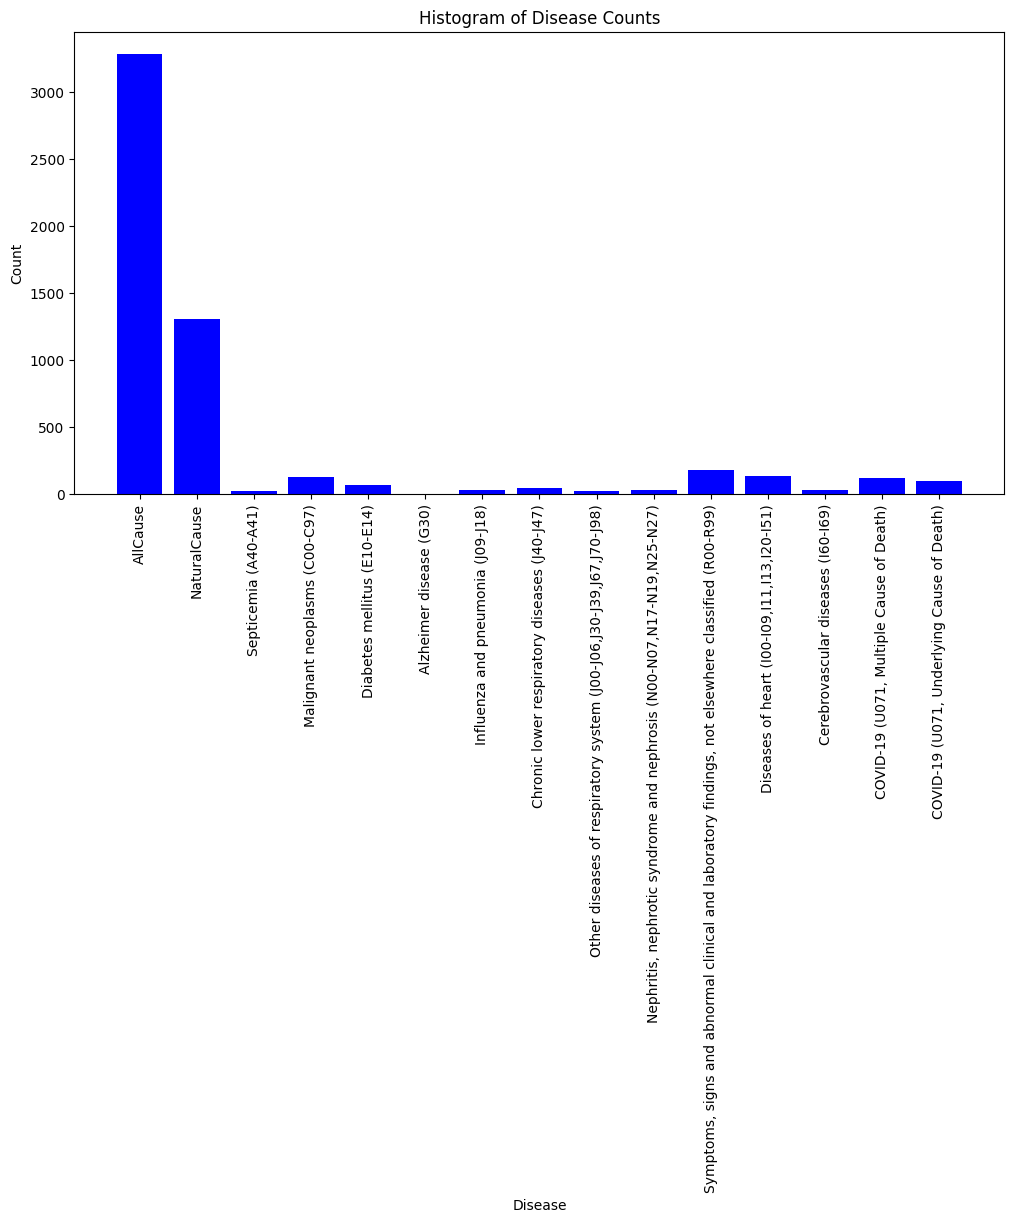

In [126]:
plot_histogram(result_J, disease_cols, False)


<ipython-input-125-2dd7c9393b19>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


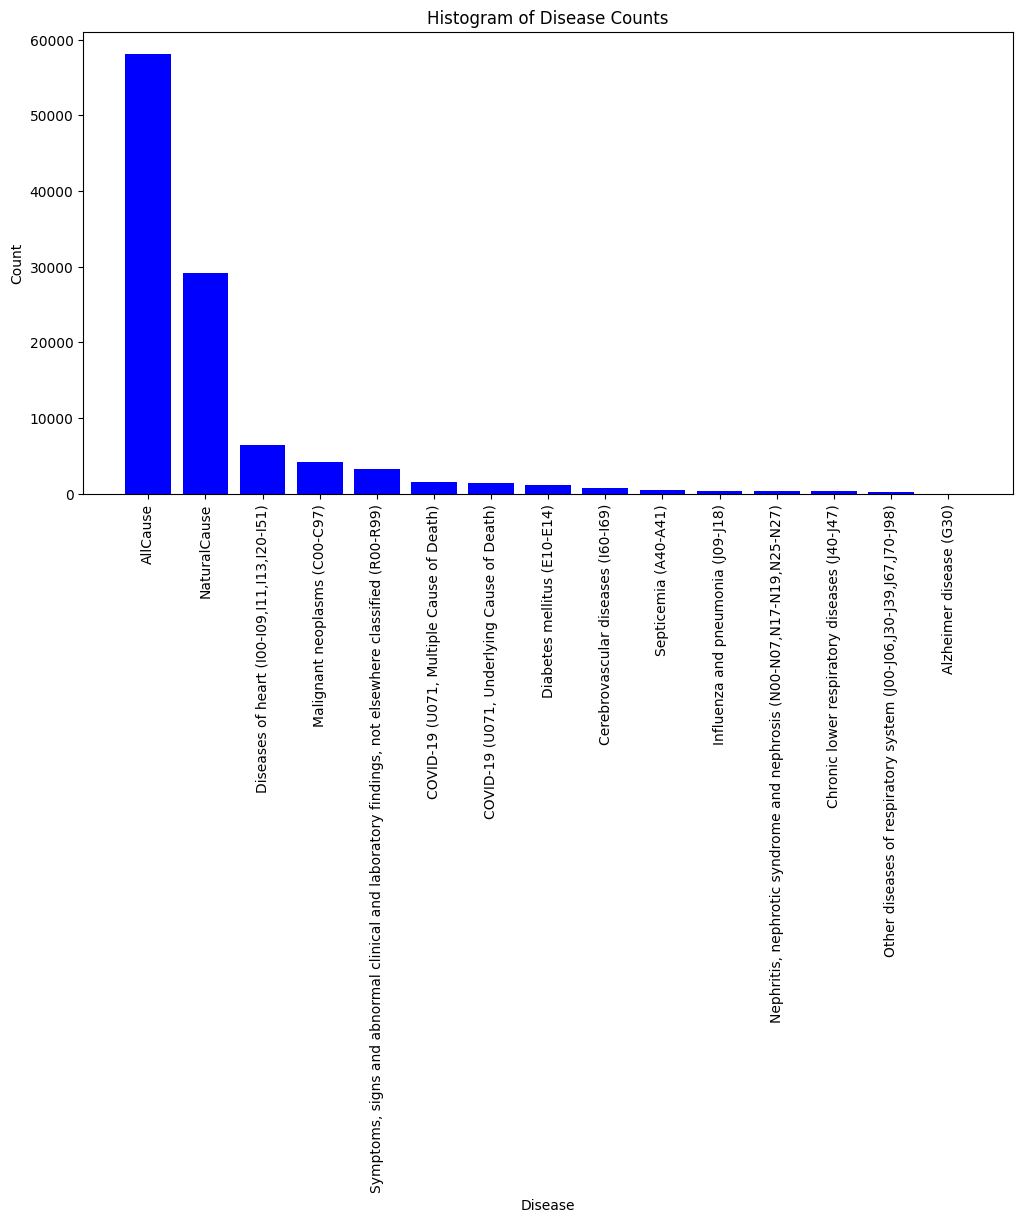

In [127]:
plot_histogram(result_El, disease_cols, True)

In [173]:
def draw_heatmap(df, columns_to_sum, color):
    # Calculate the sum for the specified columns
    df = df.drop(columns=['AgeGroup'])

    summed_values = df[columns_to_sum].sum()
    counts = summed_values.values  # Convert to NumPy array
    columns = summed_values.index  # Use index to get the labels

    cmap = sns.color_palette(color, as_cmap=True)

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(data=counts.reshape(1, -1), cmap=cmap, annot=True, fmt="d", xticklabels=columns, yticklabels=False)

    # Rotate x-axis tick labels vertically
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
    plt.title('Heatmap of Disease Counts')

    # Show the plot
    plt.show()

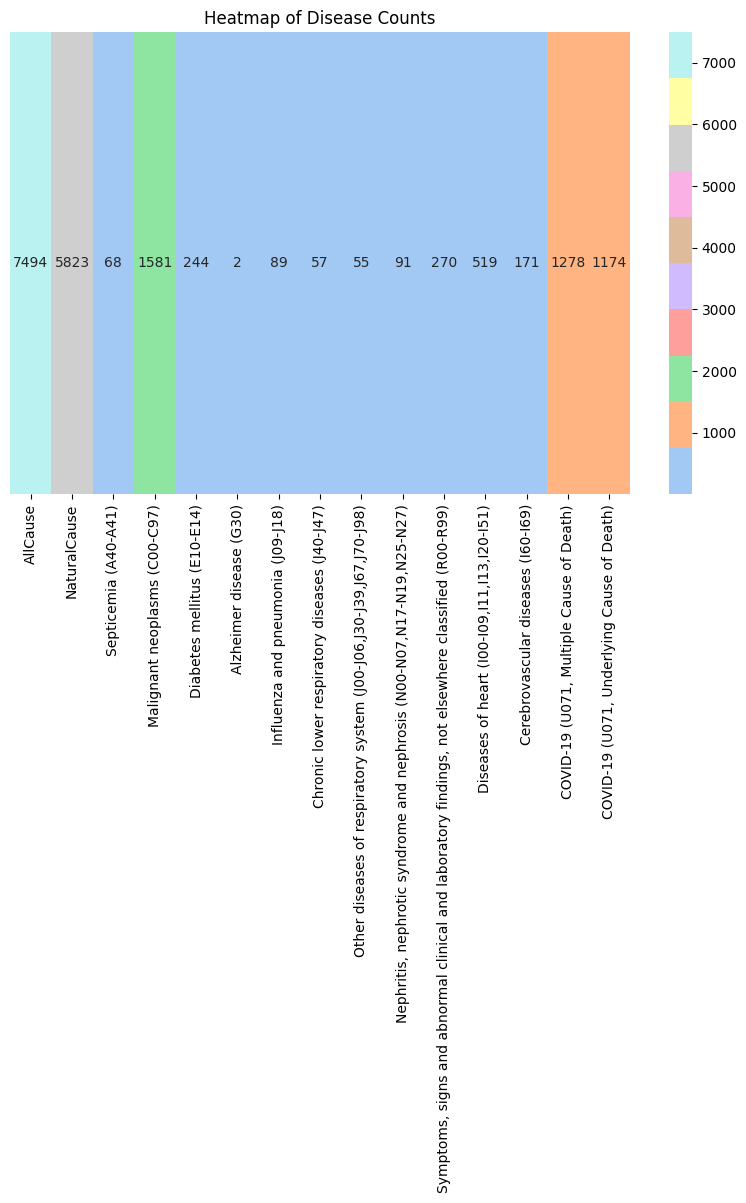

In [174]:
draw_heatmap(result_E, disease_cols, "pastel")

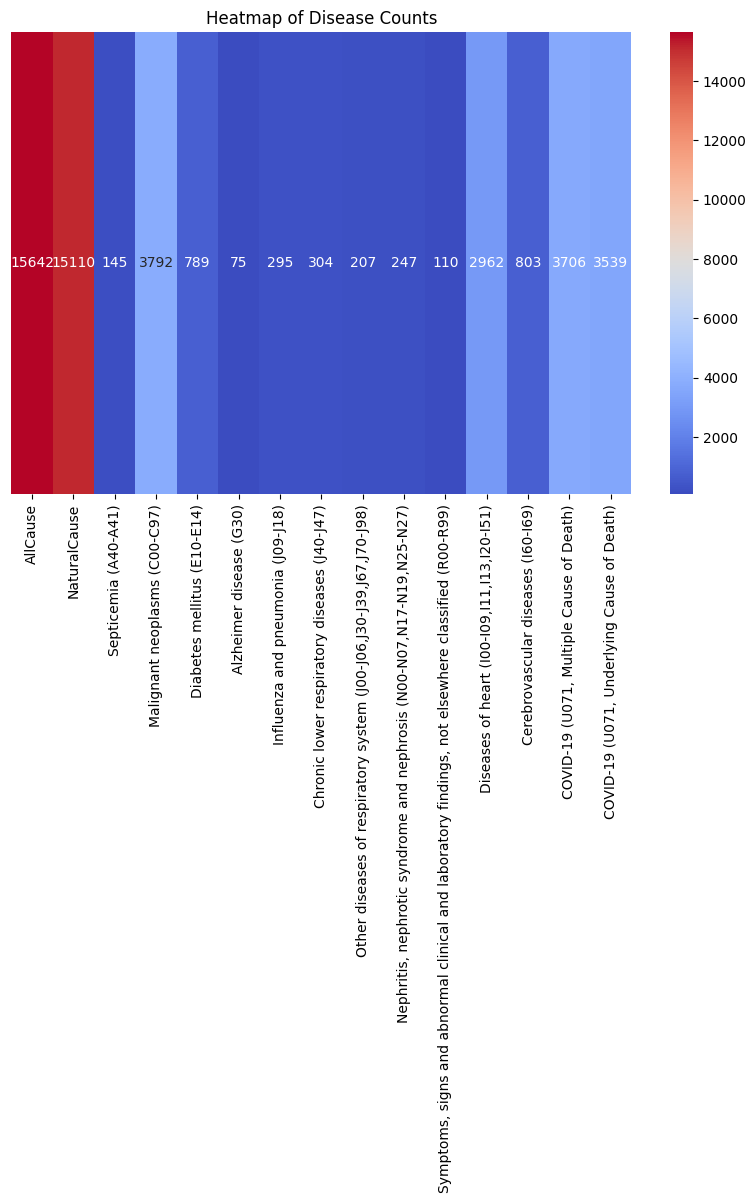

In [154]:
draw_heatmap(result_M, disease_cols, "coolwarm")

### What visualization techniques did you use? [3 points]

---
I used a heatmap and a histogram. First Histogram I used a normal and a sorted histogram. In heatmap I used pastel where each 1000 block is different color and another coolwarm where the colors go from red to blue.

---